## Vaccination rate: 50% (Lägre än IDAHO)

In [1]:
import importlib
import Agenter
import Modell
import numpy as np

importlib.reload(Modell)
importlib.reload(Agenter)

import matplotlib.pyplot as plt

N = 1000
width = 14
height = 7
initial_infected = 1
vaccination_rate = 0.5
mortality_rate = 0.0021
timesteps = 100

num_runs = 10 # antal körningar 

S_runs = [] 
I_runs = [] 
R_runs = [] 
D_runs = [] 
Re_runs = [] 

for run in range(num_runs): 
    model = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate, mortality_rate)

    S_history = []
    I_history = []
    R_history = []
    D_history = []

    for t in range(timesteps):
        model.step()
        S_history.append(model.count_status("S"))
        I_history.append(model.count_status("I"))
        R_history.append(model.count_status("R"))
        D_history.append(model.count_status("D"))

    model_df = model.datacollector.get_model_vars_dataframe()
    
    Re_runs.append(model_df["Re"].values) 

    S_runs.append(S_history)
    I_runs.append(I_history)
    R_runs.append(R_history)
    D_runs.append(D_history)


    print("Run: ", run) 
    # Skriv ut resultat efter 1000 steg
    print("S:", model.count_status("S"))
    print("I:", model.count_status("I"))
    print("R:", model.count_status("R"))
    print("D:", model.count_status("D"))

S_arr = np.array(S_runs)
I_arr = np.array(I_runs)
R_arr = np.array(R_runs)
D_arr = np.array(D_runs)
Re_arr = np.array(Re_runs) 

S_mean, S_std = np.mean(S_arr, axis=0), np.std(S_arr, axis=0)
I_mean, I_std = np.mean(I_arr, axis=0), np.std(I_arr, axis=0)
R_mean, R_std = np.mean(R_arr, axis=0), np.std(R_arr, axis=0)
D_mean, D_std = np.mean(D_arr, axis=0), np.std(D_arr, axis=0)
Re_mean, Re_std = np.mean(Re_arr, axis=0), np.std(Re_arr, axis=0)



Run:  0
S: 0
I: 0
R: 983
D: 17
Run:  1
S: 0
I: 0
R: 991
D: 9
Run:  2
S: 0
I: 0
R: 988
D: 12
Run:  3
S: 0
I: 0
R: 985
D: 15
Run:  4
S: 0
I: 0
R: 983
D: 17
Run:  5
S: 0
I: 0
R: 989
D: 11
Run:  6
S: 0
I: 0
R: 991
D: 9
Run:  7
S: 0
I: 0
R: 987
D: 13
Run:  8
S: 0
I: 0
R: 980
D: 20
Run:  9
S: 1
I: 0
R: 990
D: 9


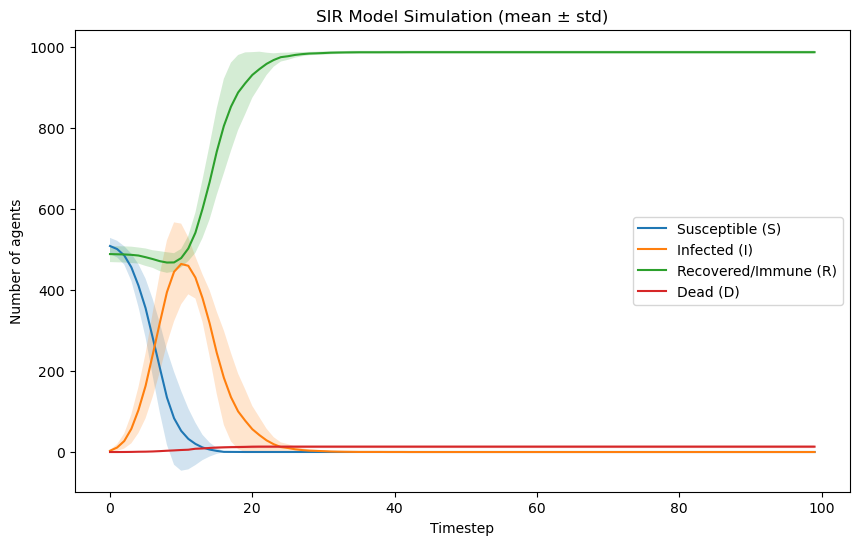

In [2]:
timesteps_range = np.arange(timesteps)

plt.figure(figsize=(10,6))
plt.plot(S_mean, label="Susceptible (S)")
plt.fill_between(timesteps_range, S_mean - S_std, S_mean + S_std, alpha=0.2)

plt.plot(I_mean, label="Infected (I)")
plt.fill_between(timesteps_range, I_mean - I_std, I_mean + I_std, alpha=0.2)

plt.plot(R_mean, label="Recovered/Immune (R)")
plt.fill_between(timesteps_range, R_mean - R_std, R_mean + R_std, alpha=0.2)

plt.plot(D_mean, label="Dead (D)")
plt.fill_between(timesteps_range, D_mean - D_std, D_mean + D_std, alpha=0.2)

plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation (mean ± std)")
plt.legend()
plt.show()


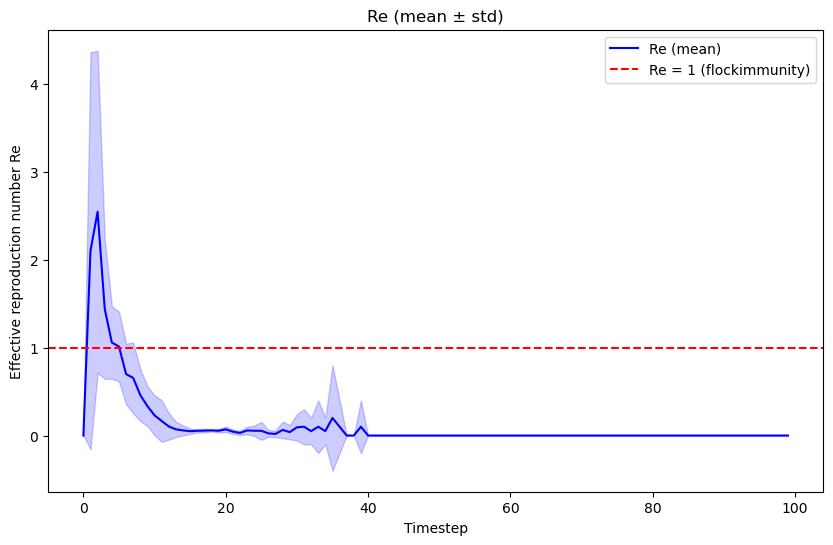

In [3]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, Re_mean, color='blue', label='Re (mean)')
plt.fill_between(timesteps_range, Re_mean - Re_std, Re_mean + Re_std, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='Re = 1 (herd immunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number Re")
plt.title(f"Re (mean ± std)")
plt.legend()
plt.show()

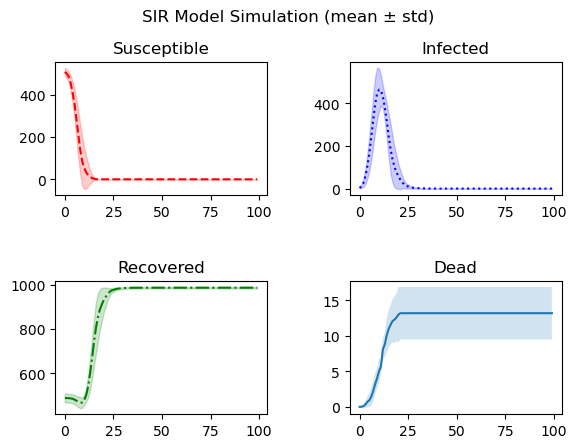

In [4]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_mean,'r--', label = "Susceptible")
axs[0, 0].fill_between(timesteps_range, S_mean - S_std, S_mean + S_std, color = 'r', alpha=0.2)
axs[0, 0].set_title('Susceptible')

axs[0, 1].plot(I_mean,'b:', label = "Infected")
axs[0, 1].fill_between(timesteps_range, I_mean - I_std, I_mean + I_std, color ='b', alpha=0.2)
axs[0, 1].set_title('Infected')

axs[1, 0].plot(R_mean,'g-.', label = "Recovered")
axs[1, 0].fill_between(timesteps_range, R_mean - R_std, R_mean + R_std, color ='g', alpha=0.2)
axs[1, 0].set_title('Recovered')

axs[1, 1].plot(D_mean, label = "Dead")
axs[1, 1].fill_between(timesteps_range, D_mean - D_std, D_mean + D_std, alpha=0.2)
axs[1, 1].set_title('Dead')

plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation (mean ± std)")
plt.show()

In [5]:
# Skapa dictionary: infector -> antal sekundära infektioner(hur många agenter som den personen har smittat)
# secondary = {}
# for event in model.infection_log: #går igenom alla smittningar
    # inf = event["infector_id"]
    # if inf is not None:
        # secondary[inf] = secondary.get(inf, 0) + 1 #om man har smittat någon, läggs det till i dictionaryn

# Medelvärdet = Re
# Re = sum(secondary.values()) / len(secondary) if secondary else 0 
# print("Re =", Re)

In [6]:
# model_df = model.datacollector.get_model_vars_dataframe()
# agent_df = model.datacollector.get_agent_vars_dataframe()

In [7]:
# agent_df.head()

In [8]:
# plt.plot(model_df)

# plt.xlabel("Tidssteg")
# plt.ylabel("Re")
# plt.show()

## Vaccination rate: 78.% (IDAHO)

In [9]:
vaccination_rate_2 = 0.785

model_2 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_2, mortality_rate)

S_history_2 = []
I_history_2 = []
R_history_2 = []
D_history_2 = []

for t in range(timesteps):
    model_2.step()
    S_history_2.append(model_2.count_status("S"))
    I_history_2.append(model_2.count_status("I"))
    R_history_2.append(model_2.count_status("R"))
    D_history_2.append(model_2.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model_2.count_status("S"))
print("I:", model_2.count_status("I"))
print("R:", model_2.count_status("R"))
print("D:", model_2.count_status("D"))


S: 1
I: 0
R: 988
D: 11


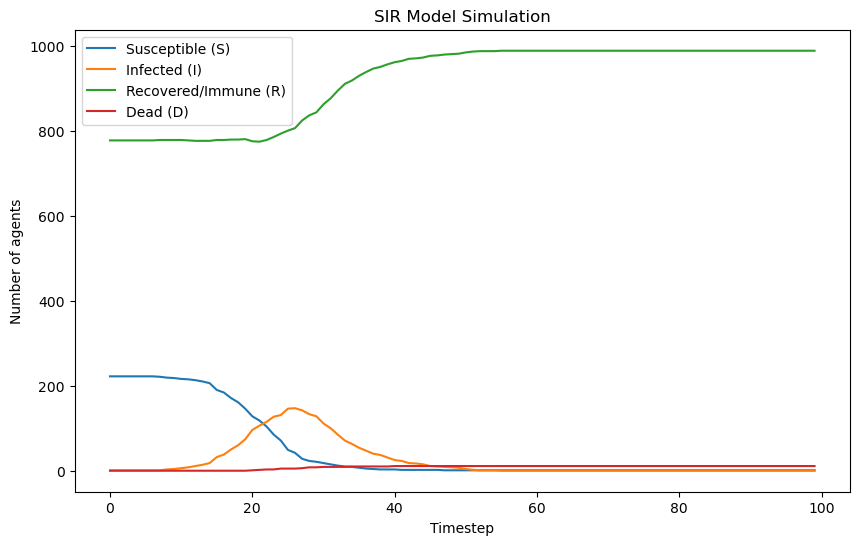

In [10]:
plt.figure(figsize=(10,6))
plt.plot(S_history_2, label="Susceptible (S)")
plt.plot(I_history_2, label="Infected (I)")
plt.plot(R_history_2, label="Recovered/Immune (R)")
plt.plot(D_history_2, label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

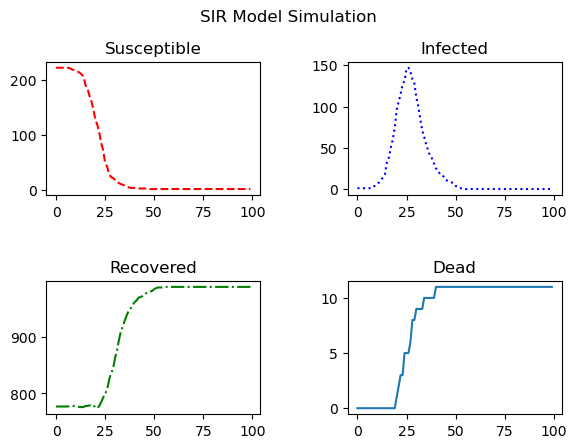

In [11]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_history_2,'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(I_history_2,'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(R_history_2,'g-.', label = "Recovered")
axs[1, 0].set_title('Recovered')
axs[1, 1].plot(D_history_2, label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [12]:
model_df_2 = model_2.datacollector.get_model_vars_dataframe()
agent_df_2 = model_2.datacollector.get_agent_vars_dataframe()

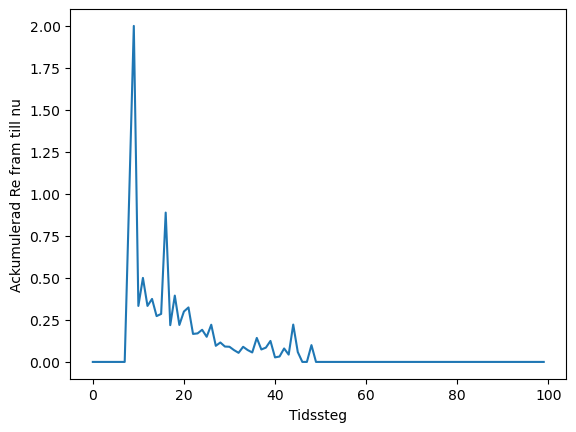

In [13]:
plt.plot(model_df_2)
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()

## Vaccination rate: 95 % (önskad vaccinationstäckning)

In [14]:
vaccination_rate_3 = 0.95

model_3 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_3, mortality_rate)

S_history_3 = []
I_history_3 = []
R_history_3 = []
D_history_3 = []

for t in range(timesteps):
    model_3.step()
    S_history_3.append(model_3.count_status("S"))
    I_history_3.append(model_3.count_status("I"))
    R_history_3.append(model_3.count_status("R"))
    D_history_3.append(model_3.count_status("D"))
    

# Skriv ut resultat efter 1000 steg
print("S:", model_3.count_status("S"))
print("I:", model_3.count_status("I"))
print("R:", model_3.count_status("R"))
print("D:", model_3.count_status("D"))


S: 35
I: 0
R: 965
D: 0


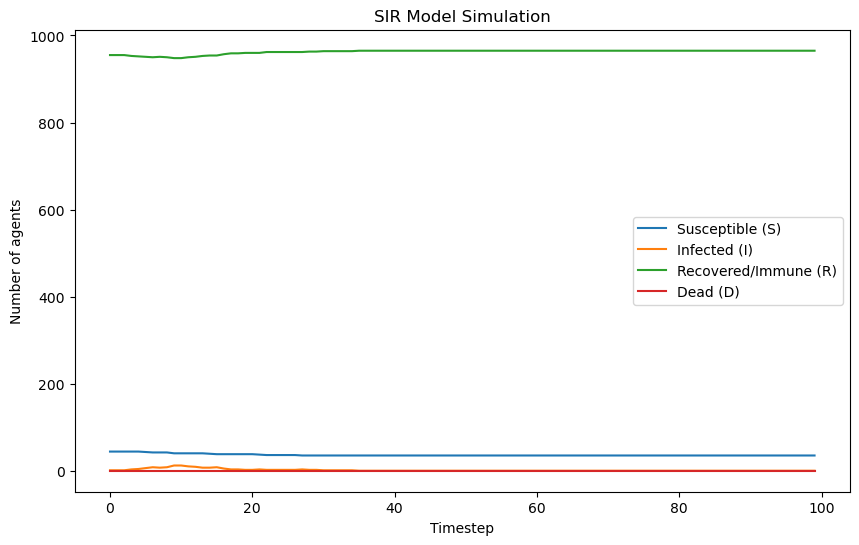

In [15]:
plt.figure(figsize=(10,6))
plt.plot(S_history_3, label="Susceptible (S)")
plt.plot(I_history_3, label="Infected (I)")
plt.plot(R_history_3, label="Recovered/Immune (R)")
plt.plot(D_history_3, label="Dead (D)")
plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation")
plt.legend()
plt.show()

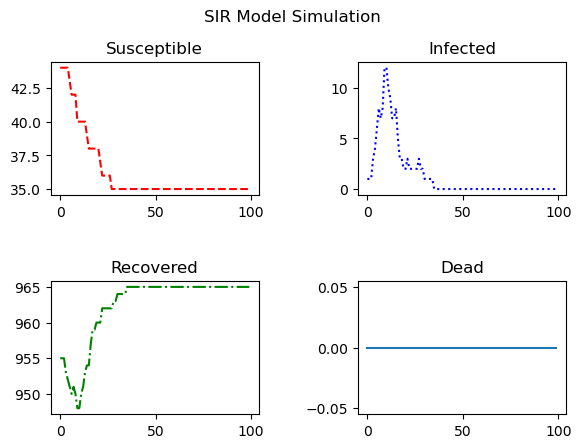

In [16]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_history_3,'r--', label = "Susceptible")
axs[0, 0].set_title('Susceptible')
axs[0, 1].plot(I_history_3,'b:', label = "Infected")
axs[0, 1].set_title('Infected')
axs[1, 0].plot(R_history_3,'g-.', label = "Recovered")
axs[1, 0].set_title('Recovered')
axs[1, 1].plot(D_history_3, label = "Dead")
axs[1, 1].set_title('Dead')
plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation")
plt.show()

In [17]:
model_df_3 = model_3.datacollector.get_model_vars_dataframe()
agent_df_3 = model_3.datacollector.get_agent_vars_dataframe()

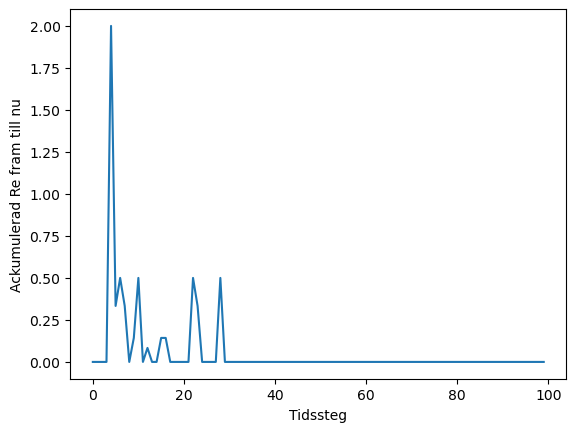

In [18]:
plt.plot(model_df_3)
plt.xlabel("Tidssteg")
plt.ylabel("Ackumulerad Re fram till nu")
plt.show()